## Exploratory Analysis and Predictive Modeling on Census Data
Data Set Infromation: The Adult Census Data Set using in this problem comes from https://archive.ics.uci.edu/ml/datasets/Adult

## A.Data Exploratory

### 1. Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
table=pd.read_csv("C:/Users/Rai Chiang/Desktop/478 assignment2 data/adult-modified.csv",na_values=["?"])
table.drop(table[table.workclass.isnull()].index,axis=0,inplace=True)
mean_age=table.age.mean()
table.age.fillna(mean_age,axis=0,inplace=True)

### 2. Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distribtions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.

#### According to the ploting results below, both numerical variables age and education are skewed.For categorical variables private seems to be the majority type of the workclass, and white seems to dominant the race feature.

                age workclass    education marital-status   race   sex  \
count   9412.000000      9412  9412.000000           9412   9412  9412   
unique          NaN         3          NaN              2      5     2   
top             NaN   Private          NaN        Married  White  Male   
freq            NaN      6947          NaN           4737   8062  6383   
mean      38.364632       NaN    10.125266            NaN    NaN   NaN   
std       12.962034       NaN     2.542118            NaN    NaN   NaN   
min       17.000000       NaN     1.000000            NaN    NaN   NaN   
25%       28.000000       NaN     9.000000            NaN    NaN   NaN   
50%       37.000000       NaN    10.000000            NaN    NaN   NaN   
75%       47.000000       NaN    13.000000            NaN    NaN   NaN   
max       90.000000       NaN    16.000000            NaN    NaN   NaN   

        hours-per-week income  
count      9412.000000   9412  
unique             NaN      2  
top            

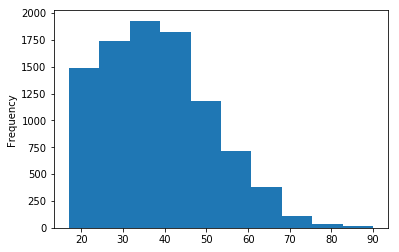

In [18]:
print table.describe(include="all")
print table.age.plot(x="age",kind="hist")

AxesSubplot(0.125,0.125;0.775x0.755)


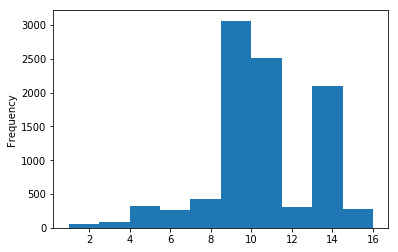

In [19]:
print table.education.plot(kind="hist")

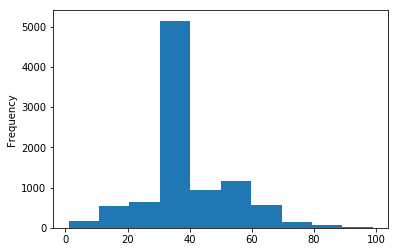

In [28]:
table["hours-per-week"].plot(kind="hist")

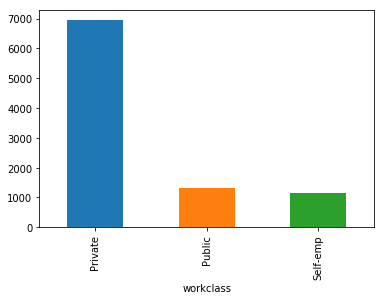

In [29]:
table.groupby(["workclass"]).workclass.count().plot(kind="bar")


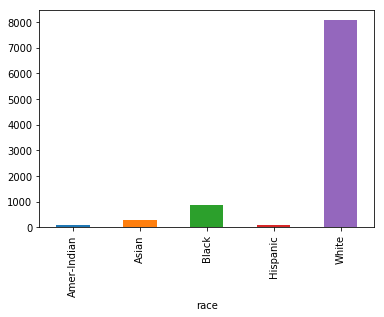

In [30]:
table.groupby(["race"]).race.count().plot(kind="bar")

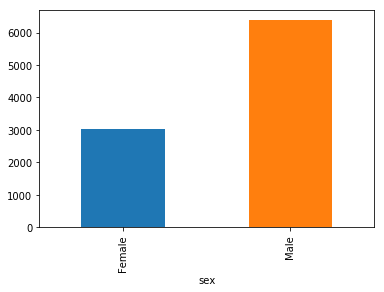

In [31]:
table.groupby(["sex"]).sex.count().plot(kind="bar")

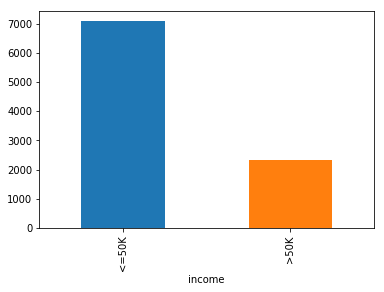

In [32]:
table.groupby(["income"]).income.count().plot(kind="bar")

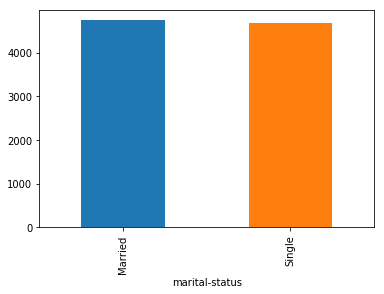

In [33]:
table.groupby(["marital-status"])["marital-status"].count().plot(kind="bar")

### 3. Perform the cross-tabulations 
education+race / work-class+income / work-class+race / race+income

#### With the exploratory results below, the instance who are white and who has 9 years of education has the highest income. Among workclass, people who are from private workclass have income that are most different between two income categories than rest of the workclass. White is dominant race among workclass and has the largest income disparity among race    

race       Amer-Indian  Asian  Black  Hispanic  White
education                                            
1                    0      0      1         0     11
2                    0      1      4         3     38
3                    0      4      5         1     71
4                    5      5     14         6    150
5                    0      3     19         2    118
6                    8      3     30         4    223
7                    4      6     49         4    261
8                    0      2     17         3     78
9                   35     67    350        23   2590
10                  26     64    206        11   1818
11                   5     10     33         4    337
12                   4      5     33         3    259
13                   5     75    102         8   1387
14                   0     27     20         1    467
15                   0     11      5         2    153
16                   0      8      4         0    101 


AxesSubplot(0.125,0.125;0

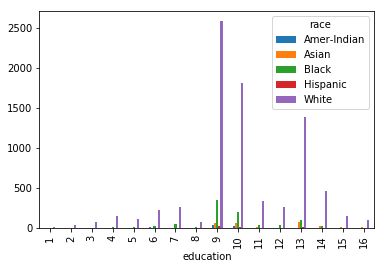

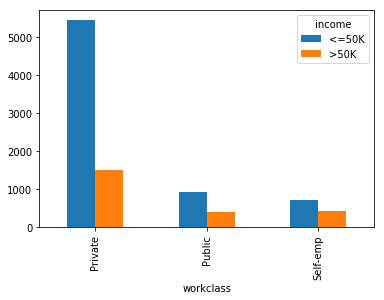

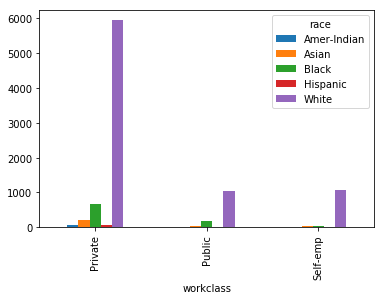

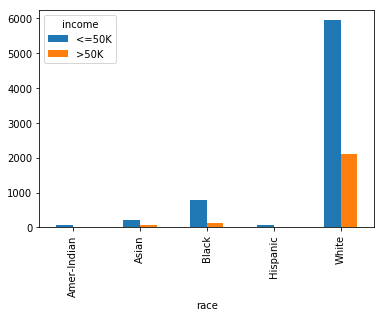

In [16]:
edu_race=pd.crosstab(table["education"],table["race"])
work_in=pd.crosstab(table["workclass"],table["income"])
work_race=pd.crosstab(table["workclass"],table["race"])
race_in=pd.crosstab(table["race"],table["income"])

print edu_race,"\n\n\n",edu_race.plot(kind="bar")
print "\n\n",work_in,work_in.plot(kind="bar")
print "\n\n",work_race,work_race.plot(kind="bar")
print "\n\n",race_in,race_in.plot(kind="bar")


low income race group 

race
Amer-Indian    0.902174
Asian          0.769759
Black          0.866592
Hispanic       0.920000
White          0.737286
dtype: float64 AxesSubplot(0.125,0.125;0.775x0.755)


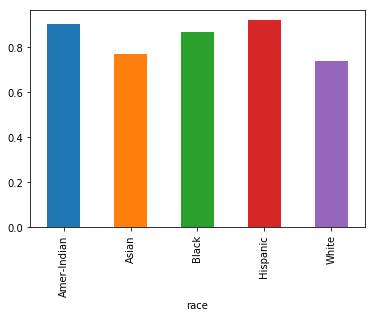

In [35]:
race_lowincome=race_in["low income"]=race_in["<=50K"]/ (race_in["<=50K"]+race_in[">50K"])
print "low income race group \n\n",race_lowincome,race_lowincome.plot(kind="bar")

### 4.Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. 

In [ ]:
income_tb=table.groupby("income").describe()
income_tb.columns.values 
income_tb.drop([('age', 'count')],axis=1,inplace=True)
income_tb.drop([('education', 'count')],axis=1,inplace=True)
income_tb.drop([('hours-per-week', 'count')],axis=1,inplace=True)
 
age_tb=income_tb[[('age', 'mean'), ('age', 'std'), ('age', 'min'), ('age', '25%'),('age', '50%'), ('age', '75%'), ('age', 'max')]]
education_tb =income_tb[[ ('education', 'mean'), ('education', 'std'), ('education', 'min'),('education', '25%'), ('education', '50%'), ('education', '75%'),('education', 'max')]]
hoursperweek_tb = income_tb[[('hours-per-week', 'mean'),('hours-per-week', 'std'), ('hours-per-week', 'min'),('hours-per-week', '25%'), ('hours-per-week', '50%'),('hours-per-week', '75%'), ('hours-per-week', 'max')]]


#### The income>50k distrubution for educatio are slicely skewed, and both of them contain outliers

              income among education


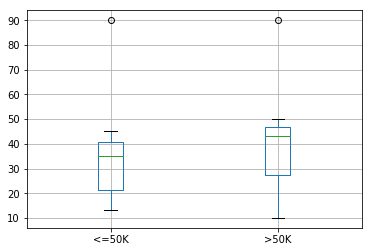

In [80]:
age_tb.T.boxplot()
print("              income among age")

#### the average year of education that people who have income >50 are higher than people who have income <= 50, and the range for the year of having education are larger among majority for people who have income >50k 

              income among education


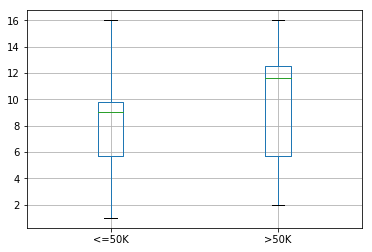

In [79]:
education_tb.T.boxplot()
print("              income among education")

#### people who have income <=50k work less than 40 hours and majority of them work between 20 hours to 40 hours. Amoong people who have income >50k some of them work more hours than people who have income<=50k, and majority of them work more than 20 hour 

              income among hours_per_week


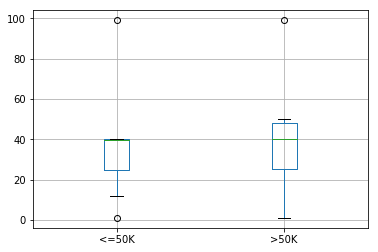

In [78]:
hoursperweek_tb.T.boxplot()
print("              income among hours_per_week")

## B.Predictive Modeling and Model Evaluation:

### 1.Create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training.
*drop "income_<=50K" which is also created as a dummy variable in earlier steps

In [11]:
new_tb=pd.read_csv("C:/Users/Rai Chiang/Desktop/478 assignment2 data/adult-modified.csv",na_values=["?"])
mean_age=new_tb.age.mean()
new_tb.age.fillna(mean_age,axis=0,inplace=True)
new_tb.dropna(how="any",axis=0,inplace=True)
new_tb.isnull().values.any() #check for any nan
new_tb=pd.get_dummies(new_tb)
newtb_class=new_tb[["income_>50K"]]
new_tb=new_tb.drop(["income_<=50K","income_>50K"],axis=1)
train,test,train_class,test_class=train_test_split(new_tb,newtb_class,train_size=0.8,random_state=7)


### 2. Build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA) with scikit-learn. For each of these perform 10-fold cross-validation and report the overall average accuracy.

In [12]:
#naive bayes classifier
b2_nbclaf=naive_bayes.GaussianNB()
b2_nbclaf.fit(train,train_class)
b2_nbclaf_p=b2_nbclaf.predict(test)

#decision tree classifier
b2_tclf=tree.DecisionTreeClassifier("entropy")
b2_tclf.fit(train,train_class)
b2_tclf_p=b2_tclf.predict(test)

#linear discriminant analysis classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(train,train_class)
lad_p=lda.predict(test)

C:\Anacon\envs\py27\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [13]:
#cross validation

new_tb=np.array(new_tb)  #the function takes array
newtb_class=np.array(newtb_class)

from sklearn import cross_validation
#evaluate the deciaion tree classifier
newtb_class=newtb_class.reshape(-1)#When we do cross validation in scikit-learn, the process requires an (R,) shape label instead of (R,1). 
tree_cross=cross_validation.cross_val_score(b2_tclf,new_tb,newtb_class,cv=10)
print"overall accuracy for Decision Tree classifier=%0.2f (+-%0.3f)"%(tree_cross.mean(),tree_cross.std())

#evaluate the naive bayes classifier
nb_cross=cross_validation.cross_val_score(b2_nbclaf,new_tb,newtb_class,cv=10)
print"overall accuracy for Naive Bayes classifier=%0.2f (+-%0.3f)"%(nb_cross.mean(),nb_cross.std())

#evaluate the linear discriminant
ld_cross=cross_validation.cross_val_score(lda,new_tb,newtb_class,cv=10)
print"overall accuracy for Linear Discriminant classifier=%0.2f (+-%0.3f)"%(ld_cross.mean(),ld_cross.std())

overall accuracy for Decision Tree classifier=0.77 (+-0.012)
overall accuracy for Naive Bayes classifier=0.72 (+-0.011)
overall accuracy for Linear Discriminant classifier=0.81 (+-0.010)


### 3. For the decision tree model (generated on the full training data), generate a visualization of tree

In [14]:

from sklearn.tree import export_graphviz
export_graphviz(b2_tclf,out_file='tree.dot', feature_names=train.columns)
import graphviz

with open("tree.dot") as f:
    graph = f.read()
graphviz.Source(graph)

In [15]:
system(dot -Tpng tree.dot -o dtree.png)

['dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.481754 to fit']

In [16]:
from IPython.display import Image
Image(filename='dtree.png', width=800)
    